# Importando Bibliotecas


In [145]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [146]:
dados = pd.read_csv('./aluguel.csv', sep= ';')
dados.head()


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


# Informações Gerais sobre a Base dados

In [147]:
type(dados)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [148]:
tipos_de_dados = pd.DataFrame(dados.dtypes, columns= ['Tipos de Dados'])

In [149]:
tipos_de_dados.columns.name = 'Variáveis'
tipos_de_dados

Variáveis,Tipos de Dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


# Tipos de Imóveis

In [150]:
tipo_de_imovel = dados.Tipo

In [151]:
tipo_de_imovel.drop_duplicates(inplace= True)
tipo_de_imovel

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

# Organizando a Visualização


In [152]:
tipo_de_imovel = pd.DataFrame(tipo_de_imovel)

In [153]:
x = range(tipo_de_imovel.shape[0])

In [154]:
for i in x:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [155]:
tipo_de_imovel.index = range(tipo_de_imovel.shape[0])
tipo_de_imovel.columns.name = 'Id'
tipo_de_imovel

Id,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


# Trabalhando com Imóveis Residênciais

In [156]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


## Filtrando apenas imóveis residenciais

In [157]:
list(dados['Tipo'].drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [158]:
residencial = ['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Casa de Vila']

In [159]:
residencial

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [160]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [161]:
selecao = dados.Tipo.isin(residencial)
selecao.head()

0     True
1     True
2    False
3     True
4     True
Name: Tipo, dtype: bool

In [162]:
dados_residencial = dados[selecao]
dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [163]:
print("Total de dados da base original : ", dados.shape[0])
print("Total de dados da base Residêncial : ", dados_residencial.shape[0])

Total de dados da base original :  32960
Total de dados da base Residêncial :  22580


In [164]:
dados_residencial.index = range(dados_residencial.shape[0])
dados_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Exportando a base nova

In [165]:
dados_residencial.to_csv('aluguel_residencial.csv', sep=';', index= False)

## Importando a base novamente

In [166]:
base_residencial = pd.read_csv('aluguel_residencial.csv', sep=';')
base_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Relatório de Análise - Base Residêncial 

## Seleções e Freqências

In [167]:
base_residencial.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


## Questões para analisar : 
     1. Selecione somente os imóveis classificados com tipo 'Apartamento'.
     2. Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.
     3. Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.
     4. Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.

 ### 1. Selecione somente os imóveis classificados com tipo 'Apartamento'.

In [168]:
selecao = dados_residencial.Tipo == 'Apartamento'
n1 = dados_residencial[selecao]
print(n1.shape[0])
n1.head()

19532


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


### 2. Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.

In [169]:
selecao = (dados_residencial.Tipo == 'Casa') | (dados_residencial.Tipo == 'Casa de Condomínio') | (dados_residencial.Tipo == 'Casa de Vila')
n2 = dados_residencial[selecao]
print(n2.shape[0])
n2.head()

2212


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
14,Casa de Condomínio,Taquara,3,1,1,115,2000.0,NaN,NaN
18,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,NaN


### 3. Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.

In [170]:
selecao = (dados_residencial.Area >= 60) & (dados_residencial.Area <= 100)
n3 = dados_residencial[selecao]
print(n3.shape[0])
n3.head()

8719


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


###  4. Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.

In [171]:
selecao = (dados_residencial.Quartos >= 4) & (dados_residencial.Valor < 2000.0)
n4 = dados_residencial[selecao]
print(n4.shape[0])
n4.head()

41


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
484,Apartamento,Recreio dos Bandeirantes,4,2,2,160,1900.0,830.0,NaN
1003,Apartamento,Taquara,4,1,1,110,1900.0,NaN,NaN
1961,Casa,Campo Grande,4,1,4,100,1600.0,NaN,NaN
2102,Casa,Engenho de Dentro,4,3,0,120,1500.0,NaN,NaN
2200,Apartamento,Recreio dos Bandeirantes,4,2,2,125,1700.0,NaN,90.0


In [172]:
print("Nº de imóveis classificados com tipo 'Apartamento' -> {}".format(n1.shape[0]))
print("Nº de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'-> {}".format(n2.shape[0]))
print("Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> {}".format(n3.shape[0]))
print("Nº de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> {}".format(n4.shape[0]))

Nº de imóveis classificados com tipo 'Apartamento' -> 19532
Nº de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'-> 2212
Nº de imóveis com área entre 60 e 100 metros quadrados, incluindo os limites -> 8719
Nº de imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 -> 41


In [173]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

# Tratamento da Dados Faltantes

In [174]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


## Visualizando dados faltantes

In [175]:
dados.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
32955,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False
32958,False,False,False,False,False,False,False,False,True


In [176]:
dados.notnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
32955,True,True,True,True,True,True,True,True,True
32956,True,True,True,True,True,True,True,True,True
32957,True,True,True,True,True,True,True,True,True
32958,True,True,True,True,True,True,True,True,False


In [177]:
dados.info()
#podemos observar que nas colunas 6,7,8 possuem dados faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [178]:
dados[dados.Valor.isnull()]
#trazendo dados faltantes em Valor

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN,NaN,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2973,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
6598,Loja/Salão,Andaraí,0,0,0,326,NaN,NaN,1140.0
7302,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
12683,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
13229,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0


In [179]:
A = dados.shape[0]
#removendo valores nulos na coluna valor
dados.dropna( subset= ['Valor'], inplace= True)#
B = dados.shape[0]
A-B

17

In [180]:
dados[dados['Condominio'].isnull()].shape[0]

4089

In [181]:
selecao = (dados.Tipo == 'Apartamento') & (dados.Condominio.isnull())

In [182]:
A = dados.shape[0]
#removendo valores nulos para apartamento sem valor no condominio 
dados = dados[~selecao]
B = dados.shape[0]
A-B

745

In [183]:
dados[dados['Condominio'].isnull()].shape[0]

3344

In [184]:
# preenchendo com zero onde valor de Condominio e IPTU estão nulos
dados = dados.fillna({'Condominio': 0,'IPTU':0})

In [185]:
dados[dados['Condominio'].isnull()].shape[0]

0

In [186]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32198 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32198 non-null  object 
 1   Bairro      32198 non-null  object 
 2   Quartos     32198 non-null  int64  
 3   Vagas       32198 non-null  int64  
 4   Suites      32198 non-null  int64  
 5   Area        32198 non-null  int64  
 6   Valor       32198 non-null  float64
 7   Condominio  32198 non-null  float64
 8   IPTU        32198 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.5+ MB


In [187]:
dados.to_csv('aluguel_residencial.csv', sep=';', index=False)

In [188]:
base_residencial_att = pd.read_csv('aluguel_residencial.csv', sep=';')
base_residencial_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32198 entries, 0 to 32197
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32198 non-null  object 
 1   Bairro      32198 non-null  object 
 2   Quartos     32198 non-null  int64  
 3   Vagas       32198 non-null  int64  
 4   Suites      32198 non-null  int64  
 5   Area        32198 non-null  int64  
 6   Valor       32198 non-null  float64
 7   Condominio  32198 non-null  float64
 8   IPTU        32198 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.2+ MB


#  Criando novas variáveis

In [189]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0


In [190]:
dados['Valor Bruto'] = dados['Valor']+ dados['Condominio']+ dados['IPTU']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0


In [191]:
dados['Valor m2'] = dados['Valor']/ dados['Area']
dados['Valor m2'] = dados['Valor m2'].round(2)
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67


In [192]:
dados['Valor Bruto m2'] = dados['Valor Bruto']/ dados['Area']
dados['Valor Bruto m2'] = dados['Valor Bruto m2'].round(2)
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67,68.87
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46


In [193]:
casa = ['Casa','Casa de Condomínio', 'Casa de Vila']

In [194]:
dados['Tipo Agregado'] = dados['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67,68.87,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento


## Excluindo Variáveis

In [195]:
dados_aux = pd.DataFrame(dados[['Tipo Agregado','Valor m2', 'Valor Bruto m2', 'Valor Bruto']])
dados_aux.head

<bound method NDFrame.head of       Tipo Agregado  Valor m2  Valor Bruto m2  Valor Bruto
0       Apartamento     42.50           56.50       2260.0
1              Casa     70.00           70.00       7000.0
2       Apartamento     34.67           68.87      10331.0
3       Apartamento     53.33           80.67       1210.0
4       Apartamento     16.67           21.46       1030.0
...             ...       ...             ...          ...
32955   Apartamento     29.63           43.52       1175.0
32956   Apartamento     23.08           33.85       2640.0
32957   Apartamento     29.17           40.54       1946.0
32958   Apartamento     42.86           53.71       3760.0
32959   Apartamento     26.00           47.26      11815.0

[32198 rows x 4 columns]>

In [196]:
del dados_aux['Valor Bruto']
dados_aux.head()

,Tipo Agregado,Valor m2,Valor Bruto m2
0,Apartamento,42.50,56.50
1,Casa,70.00,70.00
2,Apartamento,34.67,68.87
3,Apartamento,53.33,80.67
4,Apartamento,16.67,21.46


In [197]:
dados_aux.pop('Valor Bruto m2')


0        56.50
1        70.00
2        68.87
3        80.67
4        21.46
         ...  
32955    43.52
32956    33.85
32957    40.54
32958    53.71
32959    47.26
Name: Valor Bruto m2, Length: 32198, dtype: float64

In [198]:
dados_aux.head()

,Tipo Agregado,Valor m2
0,Apartamento,42.50
1,Casa,70.00
2,Apartamento,34.67
3,Apartamento,53.33
4,Apartamento,16.67


In [199]:
dados.drop(['Valor Bruto', 'Valor Bruto m2'],axis=1, inplace= True)

In [200]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento


In [201]:
dados.to_csv('aluguel_residencial.csv',sep=';', index= False)

# Criando Agrupamentos

In [202]:
dados = pd.read_csv('aluguel_residencial.csv', sep=';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
8,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,50.36,Apartamento
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento


In [203]:
bairros = dados.Bairro.unique()
bairros


array(['Copacabana', 'Jardim Botânico', 'Barra da Tijuca', 'Centro',
       'Higienópolis', 'Cachambi', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Botafogo', 'Taquara',
       'Freguesia (Jacarepaguá)', 'Tijuca', 'Olaria', 'Leblon',
       'São Cristóvão', 'Ipanema', 'Campo Grande',
       'Recreio dos Bandeirantes', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'Vargem Grande', 'São Conrado', 'Maria da Graça', 'Vila Valqueire',
       'Gávea', 'Cosme Velho', 'Bonsucesso', 'Todos os Santos',
       'Laranjeiras', 'Itanhangá', 'Flamengo', 'Piedade', 'Lagoa',
       'Santo Cristo', 'Largo do Machado', 'Catete', 'Jardim Carioca',
       'Benfica', 'Glória', 'Praça Seca', 'Vila Isabel',
       'Quintino Bocaiúva', 'São Francisco Xavier', 'Engenho Novo',
       'Engenho de Dentro', 'Pilares', 'Cidade Nova', 'Arpoador',
       'Água Santa', 'Ilha do Governador', 'Jardim Sulacap',
       'Del Castilho', 'Oswaldo Cruz', 'V

In [204]:
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [205]:
dados['Bairro'].drop_duplicates()

0             Copacabana
1        Jardim Botânico
2        Barra da Tijuca
3                 Centro
4           Higienópolis
              ...       
20554          Bancários
22613       Rio da Prata
22795      Cidade Jardim
24838    Parque Colúmbia
27683           Sepetiba
Name: Bairro, Length: 161, dtype: object

In [206]:
grupo_bairro = dados.groupby('Bairro')

In [207]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [208]:
grupo_bairro.groups

{'Abolição': [2290, 4757, 10024, 10443, 11452, 13707, 15089, 19432, 19567, 21027, 21982, 23259, 23738, 24593, 25351, 27356, 27828, 27839, 29703, 29999, 31577], 'Alto da Boa Vista': [3245, 13866, 17929, 18674, 19675, 19978, 21506], 'Anchieta': [4507, 10257, 13273, 15022, 16006, 18541, 22828, 23155, 26366], 'Andaraí': [435, 566, 660, 753, 902, 1162, 1251, 1261, 1460, 1736, 2005, 2082, 2091, 2487, 2826, 2978, 4012, 4692, 4806, 5219, 5363, 5611, 5779, 6337, 6838, 7123, 7289, 7300, 7396, 7415, 8327, 8651, 9016, 9390, 9707, 9834, 10387, 10765, 11126, 11522, 11825, 11827, 12085, 12617, 13702, 13840, 13899, 13974, 14465, 14780, 15043, 15253, 15284, 15657, 16166, 16276, 16284, 16484, 17147, 17604, 18296, 18958, 19680, 19888, 19893, 20440, 20603, 20647, 20658, 21063, 21613, 21620, 21726, 21914, 22753, 23537, 23672, 23762, 24402, 24408, 24537, 24614, 25909, 26287, 26332, 26527, 26847, 26976, 27295, 27766, 27943, 27988, 28162, 29061, 29176, 29200, 29693, 29874, 30294, 30818, ...], 'Anil': [351, 83

In [209]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro,data.Valor.mean().round(2)))

Abolição -> 2043.81
Alto da Boa Vista -> 7685.71
Anchieta -> 3861.11
Andaraí -> 1943.71
Anil -> 5022.33
Arpoador -> 11189.13
Bancários -> 1825.0
Bangu -> 11302.75
Barra da Tijuca -> 9035.2
Barra de Guaratiba -> 5858.33
Benfica -> 13491.2
Bento Ribeiro -> 1511.48
Bonsucesso -> 7756.5
Botafogo -> 19709.72
Braz de Pina -> 1325.0
Cachambi -> 1867.01
Cachamorra -> 3000.0
Cacuia -> 2438.89
Caju -> 120264.78
Camorim -> 2807.5
Campinho -> 1097.5
Campo Grande -> 5692.24
Cascadura -> 1059.73
Castelo -> 16292.73
Catete -> 5878.35
Catumbi -> 1112.5
Cavalcanti -> 17063.33
Centro -> 19021.49
Cidade Jardim -> 12000.0
Cidade Nova -> 91647.36
Cidade de Deus -> 80000.0
Cinelândia -> 7030.77
Cocotá -> 3290.0
Coelho Neto -> 4100.0
Colégio -> 885.0
Copacabana -> 4514.54
Cordovil -> 14362.82
Cosme Velho -> 5746.97
Cosmos -> 992.31
Curicica -> 4153.17
Del Castilho -> 5654.95
Encantado -> 1067.65
Engenho Novo -> 1628.74
Engenho da Rainha -> 883.57
Engenho de Dentro -> 1776.11
Estácio -> 6761.0
Flamengo -> 692

In [210]:
grupo_bairro[['Valor','Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,2043.81,180.76
Alto da Boa Vista,7685.71,758.57
Anchieta,3861.11,8.78
Andaraí,1943.71,468.81
Anil,5022.33,466.97
...,...,...
Vila Valqueire,2202.46,251.58
Vila da Penha,1729.35,294.15
Vista Alegre,1166.47,197.71


## Estastísticas Descritivas

In [211]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,21.0,2043.81,1879.96,800.0,1000.0,1200.0,2300.0,8000.0
Alto da Boa Vista,7.0,7685.71,11052.25,600.0,1300.0,1850.0,9375.0,30000.0
Anchieta,9.0,3861.11,6629.80,700.0,750.0,850.0,1000.0,20000.0
Andaraí,107.0,1943.71,2323.94,600.0,1200.0,1400.0,1700.0,20000.0
Anil,86.0,5022.33,11164.20,300.0,1100.0,1600.0,3950.0,70000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,57.0,2202.46,2868.78,800.0,1000.0,1300.0,1700.0,16000.0
Vila da Penha,155.0,1729.35,2540.18,400.0,850.0,1100.0,1500.0,24000.0
Vista Alegre,17.0,1166.47,288.94,700.0,1050.0,1200.0,1300.0,2000.0


In [212]:
grupo_bairro['Valor'].aggregate(['min','max'])

,min,max
Bairro,,
Abolição,800.0,8000.0
Alto da Boa Vista,600.0,30000.0
Anchieta,700.0,20000.0
Andaraí,600.0,20000.0
Anil,300.0,70000.0
...,...,...
Vila Valqueire,800.0,16000.0
Vila da Penha,400.0,24000.0
Vista Alegre,700.0,2000.0


## Usando Matplotlib

In [213]:
plt.rc('figure',figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

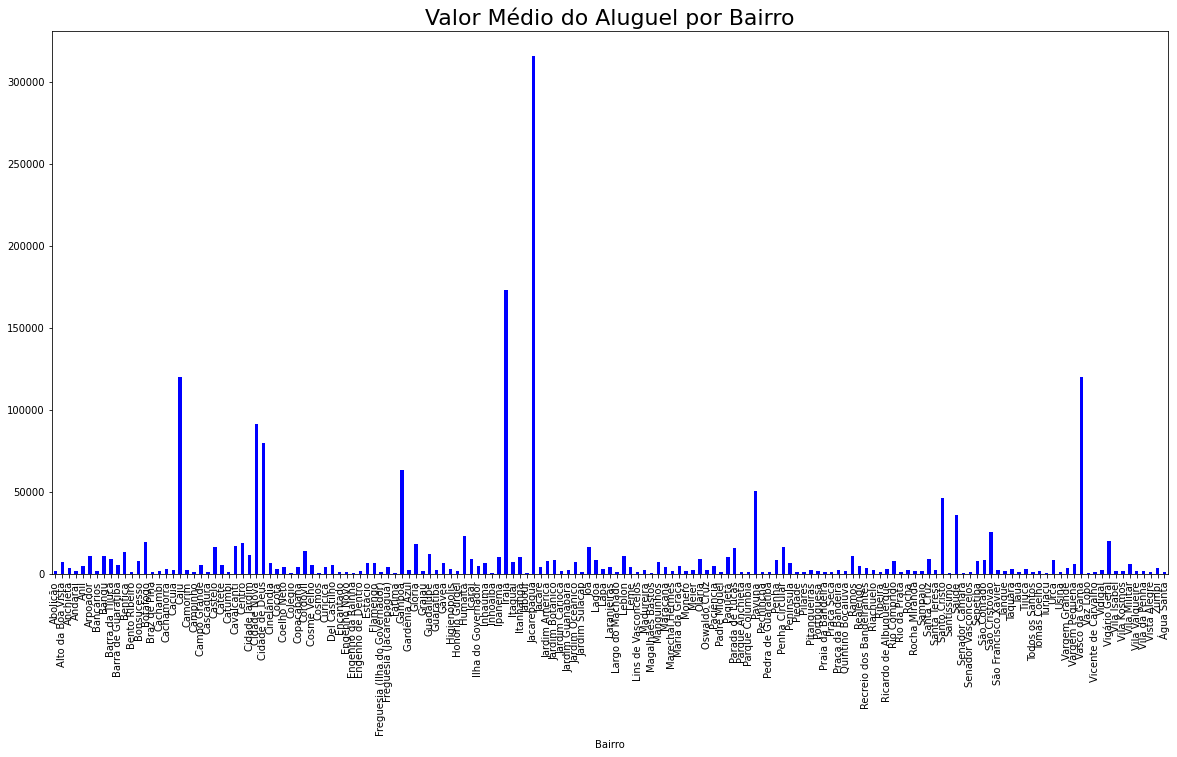

In [214]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_visible('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

# Identificando e Removando Outliers

In [219]:
plt.rc('figure', figsize = (14,6))

In [220]:
dados = pd.read_csv('aluguel_residencial.csv',';')
dados.head()

C:\Users\seiff\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3361: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,34.67,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento


## Gerando Boxplot

<AxesSubplot:>

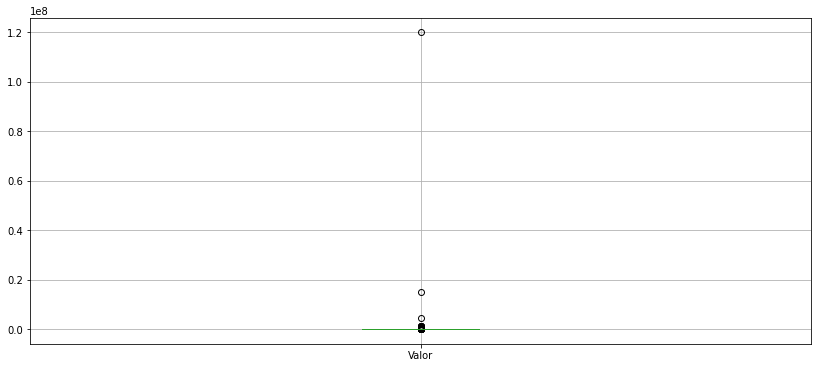

In [221]:
dados.boxplot(['Valor'])

In [222]:
valor = dados['Valor']

### Calculando quartis

In [228]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [230]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

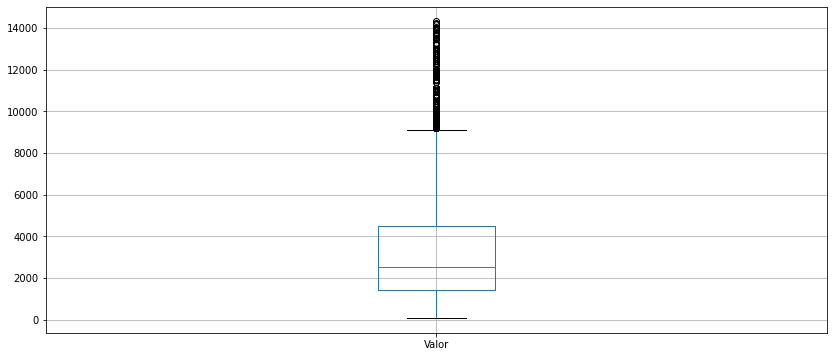

In [231]:
dados_new.boxplot(['Valor'])

## Separando por grupos


In [235]:
dados['Tipo'].unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

<AxesSubplot:title={'center':'Valor'}, xlabel='Tipo'>

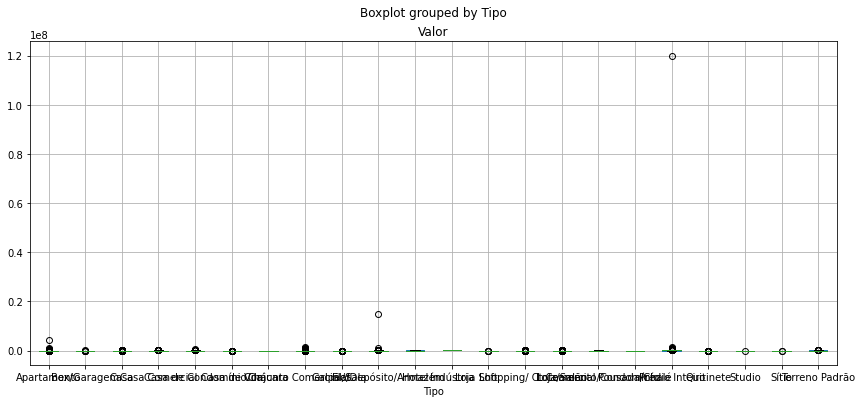

In [234]:
dados.boxplot(['Valor'], by= 'Tipo')

In [238]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [239]:
grupo_tipo.groups

{'Apartamento': [3, 4, 5, 9, 10, 11, 13, 17, 18, 19, 21, 22, 25, 26, 28, 30, 31, 32, 34, 35, 38, 39, 41, 42, 45, 46, 47, 48, 49, 52, 53, 54, 55, 58, 60, 61, 62, 63, 64, 65, 66, 68, 69, 71, 73, 74, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 101, 103, 104, 106, 108, 110, 114, 115, 117, 118, 120, 121, 122, 127, 128, 129, 130, 131, 133, 135, 136, 137, 143, 144, 148, 149, 150, 154, 156, 158, 159, 160, 161, 162, 165, 168, 172, 174, 175, 177, ...], 'Box/Garagem': [201, 363, 568, 867, 993, 1606, 1633, 1815, 1908, 2453, 3020, 3398, 3513, 3531, 3706, 3782, 3882, 3922, 4188, 5759, 5990, 6625, 7017, 7285, 7758, 9034, 9103, 9121, 9508, 10071, 10230, 11225, 11782, 11843, 11950, 12470, 12490, 12947, 13570, 13651, 14763, 15264, 15889, 16133, 17012, 17226, 17675, 18350, 18671, 19138, 19584, 19828, 20326, 20776, 20858, 21190, 21829, 21841, 22042, 23410, 23906, 24230, 24496, 24628, 24802, 25046, 25734, 26135, 26204, 27029, 28012, 28028, 28029, 28262, 28760, 29379, 29561, 30150, 30454, 30914,

In [240]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [241]:
Q1

Tipo
Apartamento                      1700.0
Box/Garagem                       250.0
Casa                             1100.0
Casa Comercial                   6000.0
Casa de Condomínio               4000.0
Casa de Vila                      750.0
Chácara                          4900.0
Conjunto Comercial/Sala          1000.0
Flat                             2500.0
Galpão/Depósito/Armazém          7000.0
Hotel                           18500.0
Indústria                      120000.0
Loft                             1750.0
Loja Shopping/ Ct Comercial      1500.0
Loja/Salão                       2200.0
Loteamento/Condomínio           14000.0
Pousada/Chalé                    1480.0
Prédio Inteiro                  14900.0
Quitinete                         900.0
Studio                           1500.0
Sítio                            9750.0
Terreno Padrão                   8000.0
Name: Valor, dtype: float64

In [247]:
dados_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados.Valor >= limite_inferior[tipo]) & (dados.Valor <= limite_superior[tipo])
    selecao = eh_dentro_limite & eh_tipo
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new,dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='Tipo'>

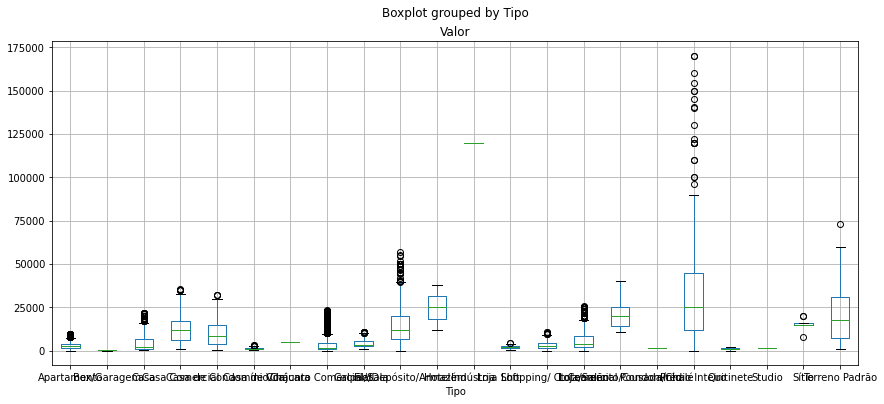

In [249]:
dados_new.boxplot(['Valor'], by= 'Tipo')

In [250]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv', sep=';', index= False)